In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import graphviz 
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, \
    RocCurveDisplay, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
data = pd.read_csv('airlines_delay.csv')

**Признаки**


*   Flight - ID рейса
*   Time - время отправления
*   Length - продолжительность полета 
*   Airline - ID авиакомпании
*   AirportFrom - аэропорт отправления
*   AirportTo - аэропорт прибытия
*   DayOfWeek - день недели, в который состоялся рейс
*   Class - с задержкой (1) или нет (0)



1. Предсказать длительность полета (Length)
2. Предсказать, задержится рейс или будет вовремя (Class)

# 1. EDA

In [ ]:
data.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [ ]:
data.shape

(539382, 8)

In [ ]:
data.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Удалим ID полета

In [ ]:
data.drop(columns=['Flight'], inplace=True)

Проверим наличие пропусков в данных

In [ ]:
data.isna().sum() * 100

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
data['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [ ]:
data['AirportFrom'].unique()

array(['ATL', 'COS', 'BOS', 'OGG', 'BMI', 'MSY', 'EWR', 'DFW', 'BWI',
       'CRW', 'LGB', 'BIS', 'CLT', 'IAH', 'LAX', 'JAX', 'SAV', 'CLE',
       'FLL', 'SAN', 'BHM', 'ROC', 'DTW', 'STT', 'AUS', 'DCA', 'PHX',
       'EYW', 'IND', 'JFK', 'ORD', 'PBI', 'SFO', 'MIA', 'DSM', 'SLC',
       'PHL', 'BZN', 'GRB', 'MBS', 'SBA', 'TYS', 'MSP', 'DEN', 'SAT',
       'BUF', 'RIC', 'SEA', 'PDX', 'LAS', 'IAD', 'HNL', 'BDL', 'MOT',
       'PSE', 'CPR', 'SNA', 'STL', 'CVG', 'PIT', 'HSV', 'SGF', 'RDU',
       'MEM', 'KOA', 'ELP', 'SJU', 'JAN', 'AEX', 'LGA', 'RSW', 'MDT',
       'GUC', 'MKE', 'CAE', 'GRR', 'FAR', 'LIT', 'OMA', 'BNA', 'EVV',
       'RDD', 'OKC', 'ITO', 'SJC', 'MCO', 'LBB', 'CSG', 'OAK', 'PHF',
       'ABQ', 'SMF', 'FAY', 'ABI', 'MSO', 'MFE', 'GEG', 'MSN', 'TPA',
       'DAY', 'RNO', 'PVD', 'ALB', 'CHO', 'ONT', 'LIH', 'PSP', 'LAN',
       'LEX', 'XNA', 'GJT', 'CMH', 'GSO', 'PSC', 'SYR', 'AVL', 'MHT',
       'GRK', 'MCI', 'TXK', 'LRD', 'ABE', 'LWB', 'ERI', 'DAL', 'ANC',
       'TUS', 'ROA',

<Axes: xlabel='Class', ylabel='count'>

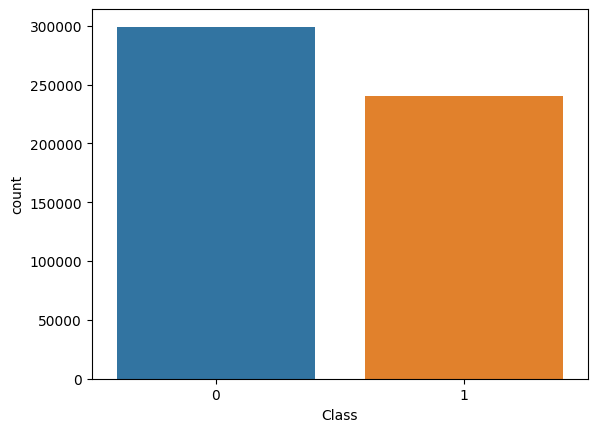

In [ ]:
sns.countplot(x='Class', data=data)

In [ ]:
data.Airline.value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

<Axes: xlabel='Airline', ylabel='Count'>

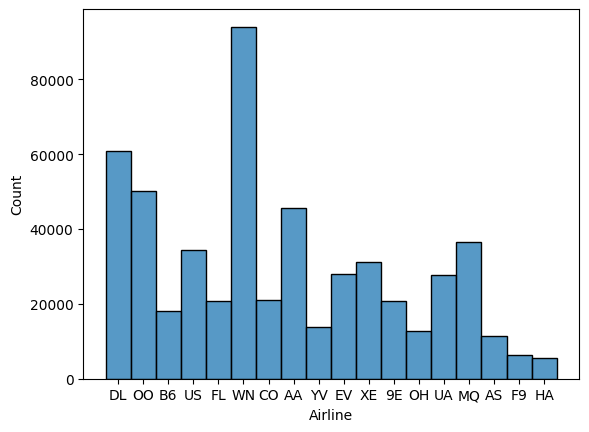

In [ ]:
sns.histplot(data=data, x="Airline")

<Axes: xlabel='DayOfWeek', ylabel='count'>

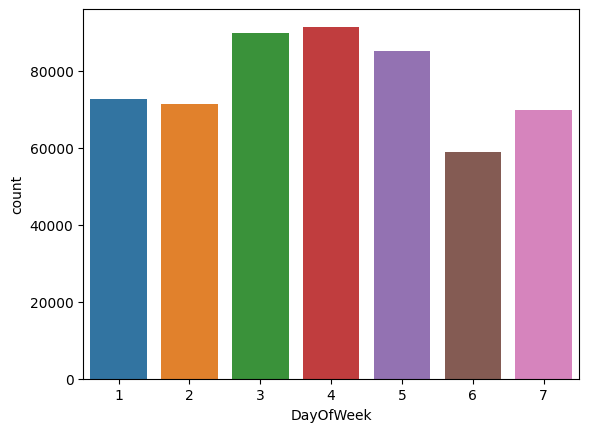

In [ ]:
sns.countplot(data=data, x='DayOfWeek')

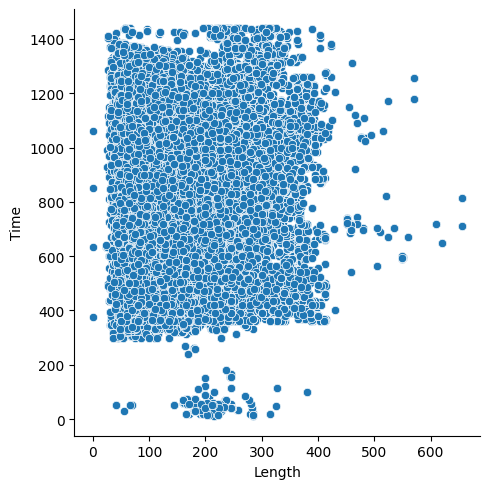

In [ ]:
sns.relplot(x='Length', y='Time', data=data);

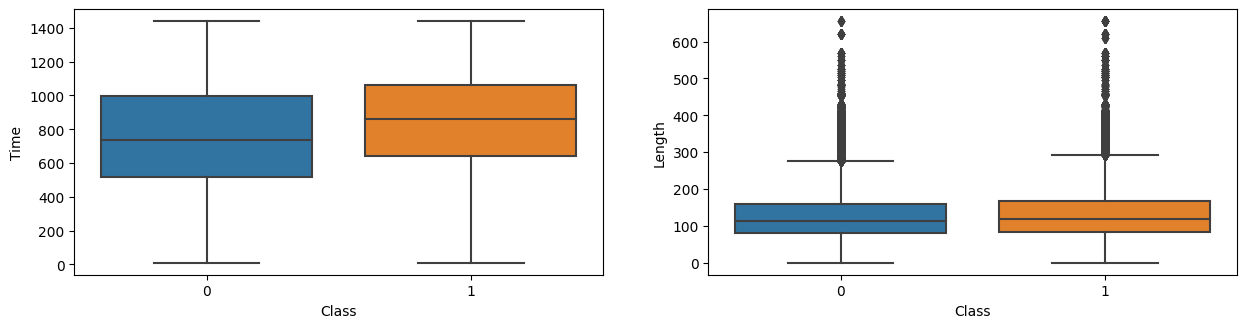

In [ ]:
cols=['Time', 'Length']
plt.figure(figsize=[15,20])
s =1
for i in cols:
  plt.subplot(5, 2, s)
  sns.boxplot(x='Class', y=i, data=data)
  s+=1

<Axes: >

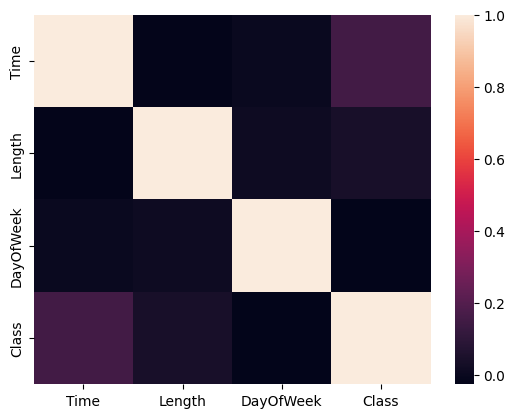

In [ ]:
sns.heatmap(data.corr())

# 2. Modeling

Преобразуем категориальные данные в числовые переменные

In [ ]:
data = pd.get_dummies (data, columns=['Airline', 'AirportFrom', 'AirportTo' ], drop_first= True )

# Linear Regression

Решим задачу регрессии, спрогнозируем время полета

In [ ]:
X = data.drop('Length',axis=1)
y = data['Length']

Разделим выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

In [ ]:
r_sq = linear_r.score(X_test, y_test)
r_sq

0.4101419818688923

In [ ]:
y_pred = linear_r.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

2921.9371697658185

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

39.51686579252483

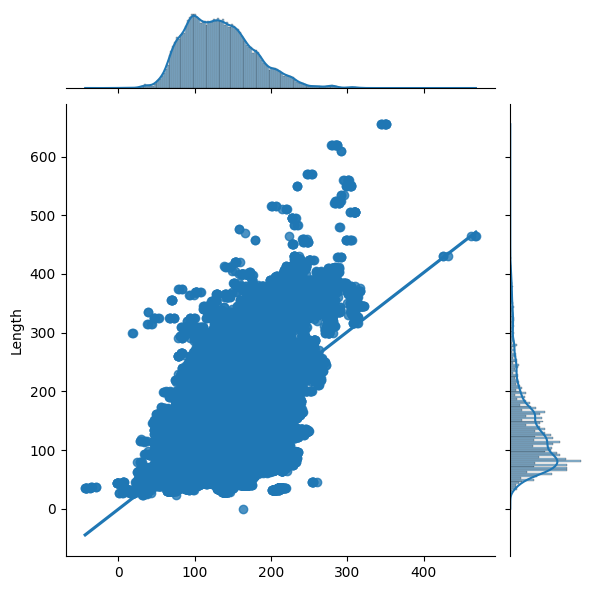

In [ ]:
sns.jointplot(
    x=linear_r.predict(X_test), y=y_test,
    kind='reg',
    ci=95)

# Logistic Regression

Сократим размер датасета до 5000 записей

In [ ]:
n = 539381 - 5000
np.random.seed(10)
drop_ind = np.random.choice(data.index, n, replace=False)
df = data.drop(drop_ind)

In [ ]:
scaler = MinMaxScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,DayOfWeek,Class,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
88,0.300353,0.210438,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0.367491,0.112795,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0.409894,0.220539,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,0.515901,0.250842,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0.424028,0.079125,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, random_state = 1)

In [ ]:
log_cl = LogisticRegression(random_state = 0, max_iter=200)
loq_reg = log_cl.fit(X_train, y_train)

In [ ]:
print("Accuracy on the training data: " + str(loq_reg.score(X_train,y_train)*100)+ "%")
print("Accuracy on the test data: " + str(loq_reg.score(X_test,y_test)*100)+ "%")

Accuracy on the training data: 67.575%
Accuracy on the test data: 62.13786213786214%


In [ ]:
print("F1-score Логистической регрессии " + str(round((f1_score(y_test, loq_reg.predict(X_test))*100),2)) + "%")


F1-score Логистической регрессии 53.95%


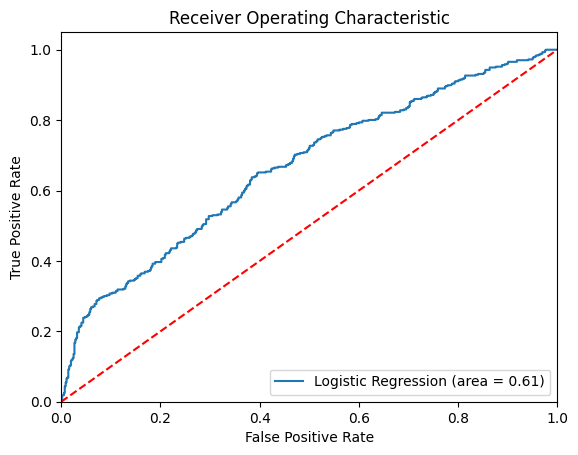

In [ ]:
logit_roc_auc = roc_auc_score(y_test, loq_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loq_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
dt_model = dt.fit(X_train, y_train)

In [ ]:
print("Accuracy on the training data: " + str(rf_model.score(X_train,y_train)*100)+ "%")
print("Accuracy on the test data: " + str(rf_model.score(X_test,y_test)*100)+ "%")

Accuracy on the training data: 99.625%
Accuracy on the test data: 60.33966033966034%


Модель сильно переобучилась

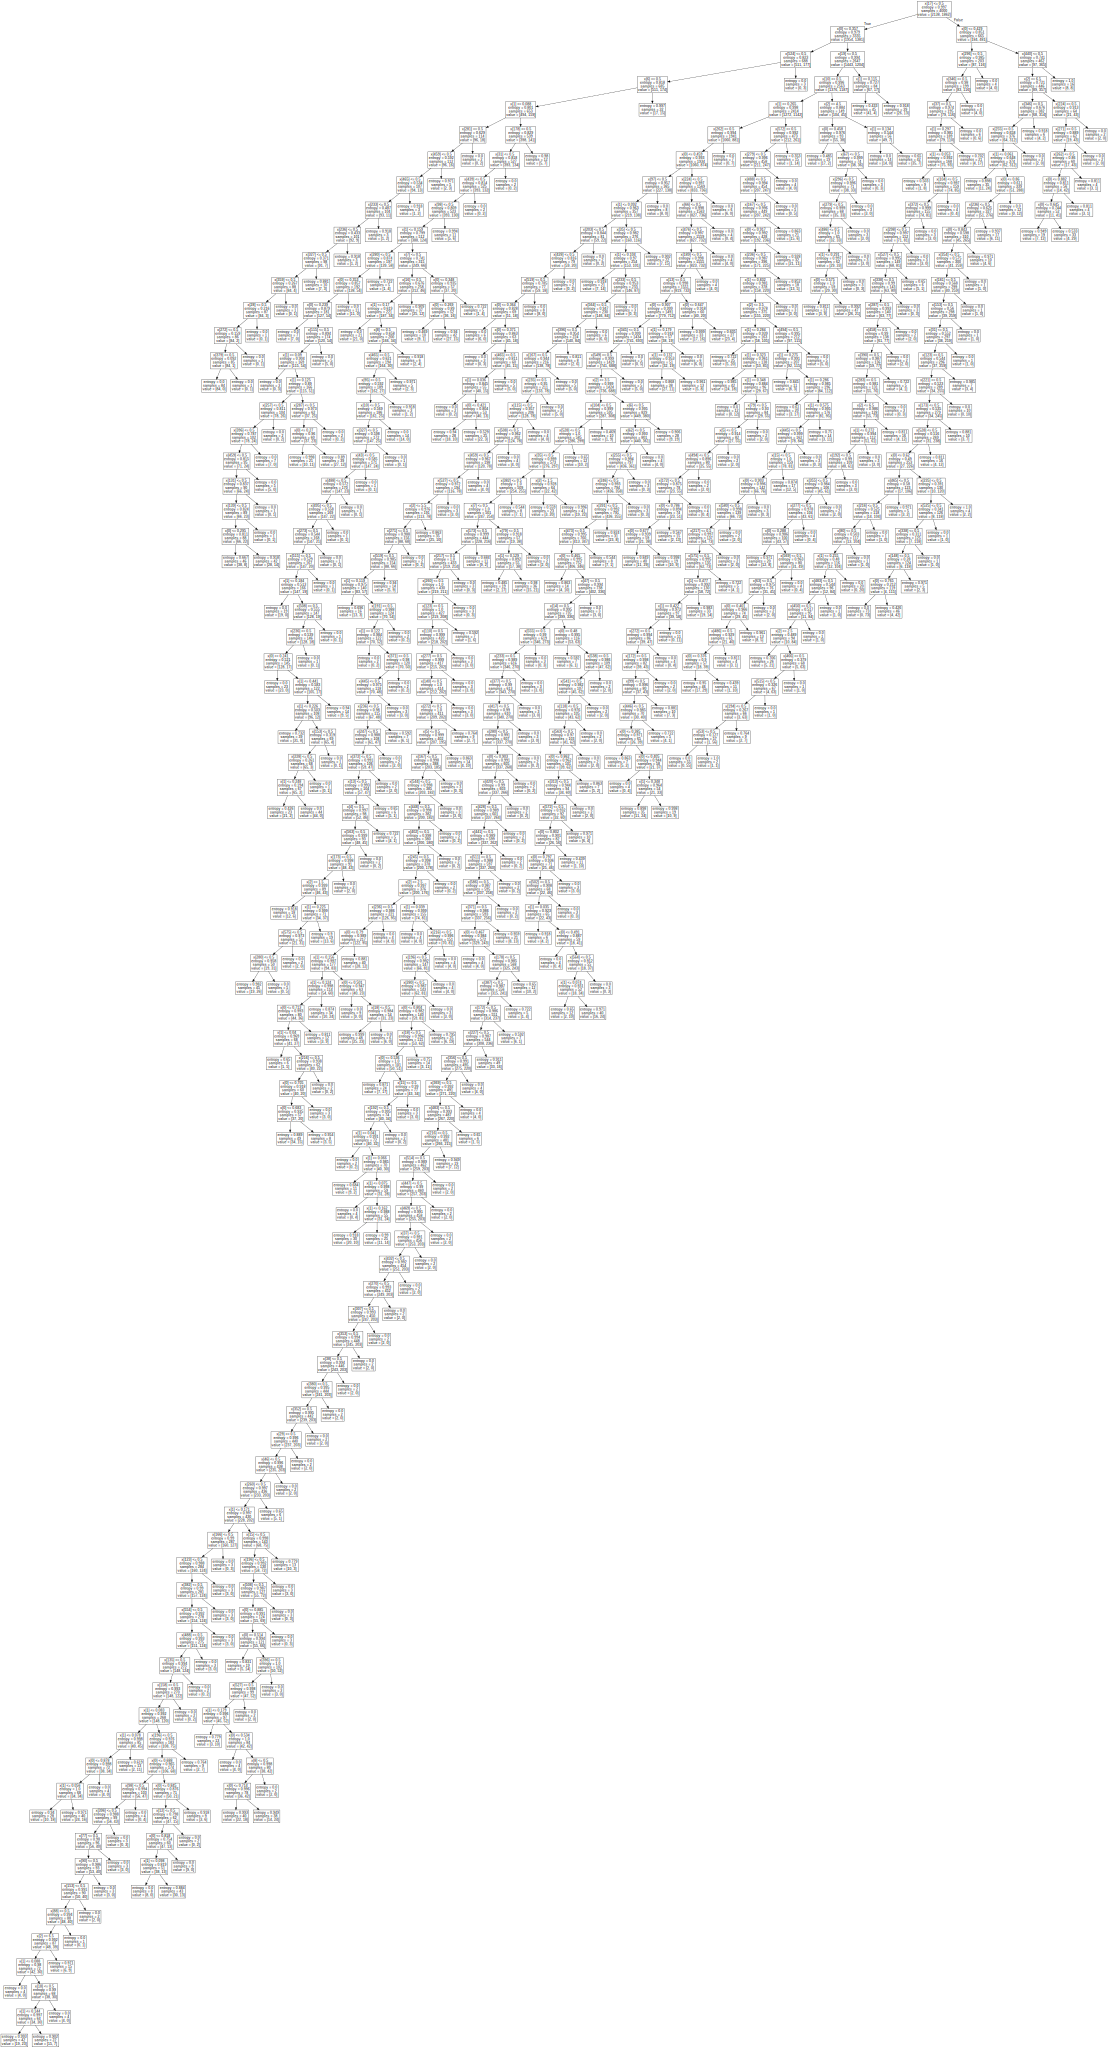

In [ ]:
dot = tree.export_graphviz(dt_model, out_file=None) 
graph = graphviz.Source(dot) 
graph